In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In this project, I aim to explore trending video data from youtube to determine if relationships exist between a number of metrics such as views, likes, dislikes and comments and if user interaction, and what specific user interaction, leads to higher rankings of each metric. First, I want to dive into the data and use visualizations to begin to infer where relationships might exist.

In [3]:
video_data = pd.read_csv('/Users/JKovach/Downloads/youtube-new/USvideos.csv')
print(video_data.head(10))
#print(len(video_data))

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   
5  gHZ1Qz0KiKM      17.14.11   
6  39idVpFF7NQ      17.14.11   
7  nc99ccSXST0      17.14.11   
8  jr9QtXwC9vc      17.14.11   
9  TUmyygCMMGA      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   
5                              2 Weeks with iPhone X               iJustine   
6          Roy Moore & Jeff Sessions Cold Open - SNL    Saturday Night Live   
7              

In [49]:
# Because the view count is so large for some videos, I want to be able to split the data
# into high view videos and low view videos. Arbitrary division at 1,000,000 views
video_data['is_large_views'] = np.where(video_data['views']>1000000, True, False)
print(video_data[['views','is_large_views']].head(10))

# Number of videos over 1,000,000 views: 16341
print(len(video_data[video_data.is_large_views==1]))

     views  is_large_views
0   748374           False
1  2418783            True
2  3191434            True
3   343168           False
4  2095731            True
5   119180           False
6  2103417            True
7   817732           False
8   826059           False
9   256426           False
16341


In this experiement, I am going to play the role of a youtube personality. My channel produces videos which seek to explore controvesial topics in depth. Because the content is controversial, I have noticed that the comments on my videos often degrade into trolling, name calling, and unproductive vitriol, which I would like to avoid. However, I would also like to maintain high rankings within youtube's trending algorithm and I am concerned that disabling comments may affect these rankings. First I start by comparing the view counts of videos with less than 1,000,000 views based on whether they have comments activated or not. In the same plot, I'll also compare the view counts per comment availability for videos over 1,000,000 views.

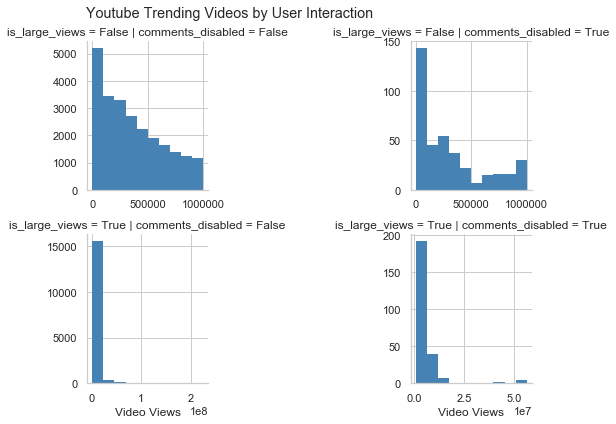

In [55]:
sns.set(style='whitegrid')
v = sns.FacetGrid(video_data, row='is_large_views', col='comments_disabled',
                  sharex=False, sharey=False)
v.map(plt.hist, 'views', color='steelblue', lw=0)
plt.subplots_adjust(top=.9, right=1.2)
v.set_axis_labels('Video Views')
plt.suptitle('Youtube Trending Videos by User Interaction')
plt.show()

As a secondary metric, I want to look at likes for videos with comments disabled. In order to do this, I repeat the split above and plot the four categorical values.

In [63]:
# Split data by > or < 10,000 likes and get number of videos over 10,000 likes
video_data['is_large_likes'] = np.where(video_data['likes']>10000, True, False)
print(video_data[['likes','is_large_likes']].head(10))
print(len(video_data[video_data.is_large_likes==1]))

    likes  is_large_likes
0   57527            True
1   97185            True
2  146033            True
3   10172            True
4  132235            True
5    9763           False
6   15993            True
7   23663            True
8    3543           False
9   12654            True
26177


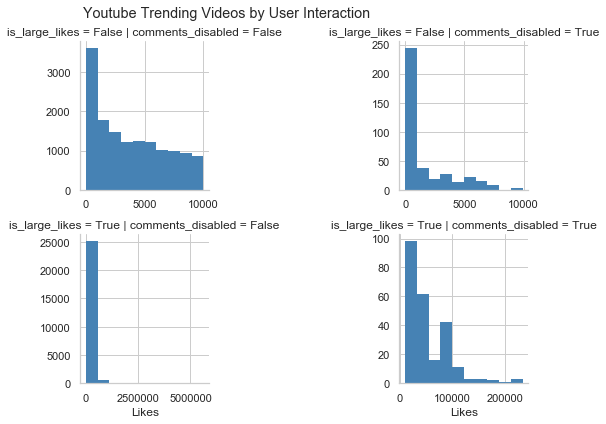

In [66]:
# Plot 2x2 categorical values for likes
v = sns.FacetGrid(video_data, row='is_large_likes', col='comments_disabled', 
                  sharey=False, sharex=False)
v.map(plt.hist, 'likes', color='steelblue', lw=0)
plt.subplots_adjust(top=.9, right=1.2)
v.set_axis_labels('Likes')
plt.suptitle('Youtube Trending Videos by User Interaction')
plt.show()

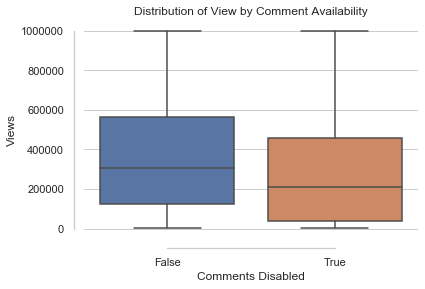

Ttest_indResult(statistic=4.532637557663365, pvalue=5.85259180912576e-06)

In [82]:
# Isolate by number of views (high v. low)
low_views = video_data[video_data.is_large_views==False]
high_views = video_data[video_data.is_large_views==True]

# Boxplot of low view video like distribution
a = sns.boxplot(x='comments_disabled', y='views', data=low_views)
plt.title('Distribution of View by Comment Availability')
sns.despine(offset=10, trim=True)
a.set(xlabel='Comments Disabled', ylabel='Views')
plt.show()

# t-test to determine if difference in 'low view' videos with and without comments
# is significant
stats.ttest_ind(low_views[low_views.comments_disabled==False].views,
                low_views[low_views.comments_disabled==True].views)

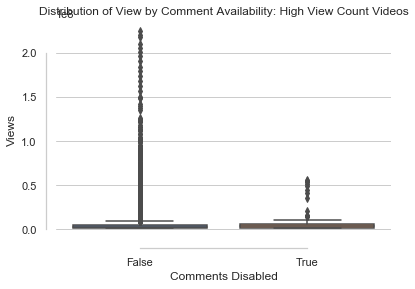

Ttest_indResult(statistic=-0.8552934435973997, pvalue=0.39240125763024836)

In [90]:
a = sns.boxplot(x='comments_disabled', y='views', data=high_views)
plt.title('Distribution of View by Comment Availability: High View Count Videos')
sns.despine(offset=10, trim=True)
a.set(xlabel='Comments Disabled', ylabel='Views')
plt.show()

# t-test to determine if difference in 'high view' videos with and without comments
# is significant
stats.ttest_ind(high_views[high_views.comments_disabled==False].views,
                high_views[high_views.comments_disabled==True].views)

Above, I compared the distribution of views for videos with comments enabled versus disabled. Because my channel is expected to received less than 1mil views per video, and because the views for videos over 1mil views is highly variable, I plan to exclude videos with more than 1mil views in my data. Based on my t-test and p-value, I can say there is a significant difference between videos and that the difference in mean between the two is about 65,000 likes (64,702.276). I decide I need to study the effect of disabling comments on my videos so that I don't kill the viewership of my channel.

Experiment Summary: 
    
    I am going to use an A/B test to determine if disabling comments from videos will have a significant impact to the viewership of my channel. I propose that disabling comments will have a significant effect on viewership and we will have to explore other ways of mitigating the negative speech present in the comments, but need to devise a way to test this hypothesis.
    
Versions:

    For the A/B test, the two things I will compare are my self-made videos. To divide the two groups, I want to randomly enable or disable comments each time a video is accessed. I produce two videos a week so I plan to release both with comments randomly disabled based on user account.
    
Sample and Groups:

    The sample will be my viewers and the groups tested will be the two versions of the videos on will be my viewer base. I know my average video receives 10,000 views in the first two weeks after publishing, so I will assign one version of the video randomly each time a user clicks on one of my videos. I will create a function which will tie the video version to the user so that for any given user only one version of the video will display. I will do this for four videos over two weeks and count views for each version of each video for two weeks following its release date.
    
Hypothesis:
    
    I hypothesize that, because people have a tendency to discuss controversial topics passionately, videos for which comments are disabled will receive significantly fewer views than those with comments enabled. The null hypothesis is that there will be no significant difference for videos with comments disabled versus those with comments enabled.
    
Key Metrics:

    For this experiment, I will use views as my key metric for determining the effect of disabling comments. Because users will be assigned 1 of 2 versions of the video at random we will be able to directly compare the views for the same content based on user ability to interact with it. Additionally, because liking or disliking content serves as a secondary method of user interaction we will keep track of these metrics as well. However, because the content we produce is controversial and some people will inherently disagree with it, using likes as a primary metric will be too noisy to be reliable.
    
Other Variables:

    We will measure variables on the user end such as age, location, gender, and race as able to ensure truly random distribution of the two sample groups. As with likes, because the content is controversial and may be reacted to differently, we want to ensure that one video sample group isn't significantly weighted to one gender or race, or skewed toward older or younger people.
    
Potential Biases:

    The greatest potential bias for this study will likely come from a failure of uniformity between the two sample groups. Groups which have a clear bias against topics of one video may be less likely to view it, which could be either be a case of selection bias or assignment bias. Additionally, video titles may sway users toward or away from viewing which is why we will keep track of user demographics to ensure viewership for each group is similar.
    
Conditions of Success:

    In order to confirm our hypothesis, we will monitor the views of each of the four videos for two weeks following its release. Where the test group is ≥10% less views than the control we will consider the change significant. If after the conclusion of the study, the collective average of changes in viewership is ≥10% we will consider the difference significant and confirm the hypothesis.